In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('Walmart_sales.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Select features and target
features = ['Fuel_Price', 'Temperature']  # Updated features
target = 'Weekly_Sales'

In [6]:
df = df[['Weekly_Sales','Temperature', 'Fuel_Price']]
df

,Weekly_Sales,Temperature,Fuel_Price
0,1643690.90,42.31,2.572
1,1641957.44,38.51,2.548
2,1611968.17,39.93,2.514
3,1409727.59,46.63,2.561
4,1554806.68,46.50,2.625
...,...,...,...
6430,713173.95,64.88,3.997
6431,733455.07,64.89,3.985
6432,734464.36,54.47,4.000
6433,718125.53,56.47,3.969


Weekly_Sales       Axes(0.125,0.11;0.227941x0.77)
Temperature     Axes(0.398529,0.11;0.227941x0.77)
Fuel_Price      Axes(0.672059,0.11;0.227941x0.77)
dtype: object

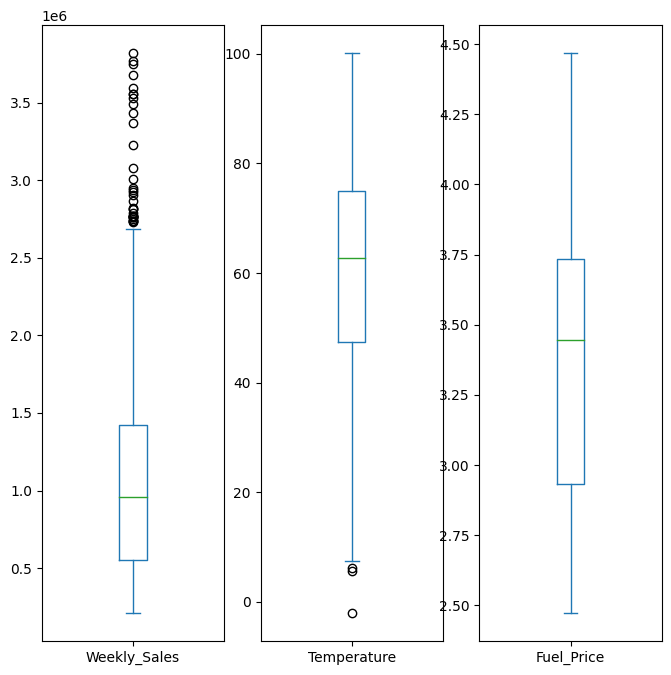

In [7]:
df.plot(kind='box', subplots=True, figsize=(8,8))

In [8]:
# Prepare data
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define ANN model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(8, activation='relu'),  # Hidden layer
    layers.Dense(1)  # Output layer
])


In [13]:
# Compile the model
model.compile(loss='mse', optimizer='adam')


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
129/129 [==============================] - 2s 8ms/step - loss: 1403913764864.0000 - val_loss: 1431985061888.0000
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 1403899740160.0000 - val_loss: 1431960551424.0000
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 1403858452480.0000 - val_loss: 1431899734016.0000
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 1403772338176.0000 - val_loss: 1431783997440.0000
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 1403623964672.0000 - val_loss: 1431598661632.0000
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 1403399569408.0000 - val_loss: 1431330226176.0000
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 1403086307328.0000 - val_loss: 1430968336384.0000
Epoch 8/100
129/129 [==============================] - 0s 3ms/step - loss: 1402673823744.0000 - val_loss: 1430500409344.0000


In [15]:
# Make predictions on test data
predicted_sales = model.predict(X_test)

41/41 [==============================] - 0s 1ms/step


In [16]:
# Evaluate performance
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predicted_sales)
r2 = r2_score(y_test, predicted_sales)
print(f"MAE: {round(mae, 2)}")
print(f"R^2: {round(r2, 2)}")



MAE: 673605.4
R^2: -1.33


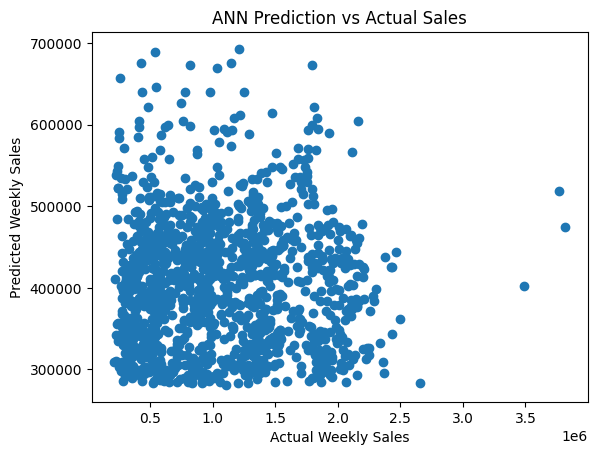

In [17]:
# Plot actual vs predicted sales
plt.scatter(y_test, predicted_sales)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('ANN Prediction vs Actual Sales')
plt.show()

In [18]:
# Predict sales for a new data point
new_data = pd.DataFrame({'Fuel_Price': [3.5], 'Temperature': [25.0]})
new_data_scaled = scaler.transform(new_data)
predicted_sales_new = model.predict(new_data_scaled)[0]
print(f"Predicted Weekly Sales for new data: {predicted_sales_new}")

1/1 [==============================] - 0s 41ms/step
Predicted Weekly Sales for new data: [497478.94]
